# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup 
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import requests
import time
from scipy.stats import linregress

# Import API key 
from api_key import weather_api_key

# Incorporate citipy to determine city based on latitude and longtitude 
from citipy import citipy 

# Output File (CSV)
output_data_file = "output_data/cities.csv" 

# Range of latitudes and longtitudes 
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities 
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations 
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination 
for lat_lng in lat_lngs: 
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name 
    
    #If the city is unique, then add it to a cities list 
    if city not in cities: 
        cities.append(city)
        
# Print the city count to confirm sufficient count 
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# Set list to hold city data
city_data = []

# Create counters
record_count = 1
set_count = 1

print("Beginning Data Retrieval \n--------------------------------------------------------------")

# Loop through the list of cities and perform a request for data on each
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = query_url + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()        

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_cloudiness = city_weather["clouds"]["all"]  
        city_windspeed = city_weather["wind"]["speed"]  
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append column names
        city_data.append({'City':city,
                          'Lat':city_lat,
                          'Lng':city_lon,
                          'Max Temp':city_temp,
                          'Humidity':city_humidity, 
                          'Cloudiness':city_cloudiness,
                          'Wind Speed':city_windspeed,                          
                          'Country':city_country,
                          'Date':city_date})
    
    except:
        print("City not found. Skipping...")
        pass
        
    time.sleep(2)
    
print (f"-------------------------------------------------------------- \
       \nData Retrieval Complete\
       \n--------------------------------------------------------------")

Beginning Data Retrieval 
--------------------------------------------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | margate
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | dekar
Processing Record 6 of Set 1 | paamiut
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | calan
Processing Record 9 of Set 1 | buraydah
Processing Record 10 of Set 1 | berberati
Processing Record 11 of Set 1 | takoradi
Processing Record 12 of Set 1 | salinopolis
Processing Record 13 of Set 1 | bandarbeyla
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | nador
Processing Record 17 of Set 1 | torbay
Processing Record 18 of Set 1 | manta
Processing Record 19 of Set 1 | kaduqli
Processing Record 20 of Set 1 | safranbolu
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of

Processing Record 34 of Set 4 | hudiksvall
Processing Record 35 of Set 4 | laguna
Processing Record 36 of Set 4 | ust-tsilma
Processing Record 37 of Set 4 | grindavik
Processing Record 38 of Set 4 | negombo
Processing Record 39 of Set 4 | behshahr
Processing Record 40 of Set 4 | bilma
Processing Record 41 of Set 4 | birao
Processing Record 42 of Set 4 | honningsvag
Processing Record 43 of Set 4 | dalbandin
Processing Record 44 of Set 4 | olafsvik
Processing Record 45 of Set 4 | sistranda
Processing Record 46 of Set 4 | baijiantan
Processing Record 47 of Set 4 | mahadday weyne
City not found. Skipping...
Processing Record 48 of Set 4 | biu
Processing Record 49 of Set 4 | karauzyak
City not found. Skipping...
Processing Record 0 of Set 5 | jardim
Processing Record 1 of Set 5 | yanam
Processing Record 2 of Set 5 | khilchipur
Processing Record 3 of Set 5 | hamilton
Processing Record 4 of Set 5 | turayf
Processing Record 5 of Set 5 | nalut
Processing Record 6 of Set 5 | puerto cabezas
Proce

Processing Record 26 of Set 8 | yerkoy
Processing Record 27 of Set 8 | bossembele
City not found. Skipping...
Processing Record 28 of Set 8 | misratah
Processing Record 29 of Set 8 | harwich
Processing Record 30 of Set 8 | hashtrud
Processing Record 31 of Set 8 | serro
Processing Record 32 of Set 8 | bathsheba
Processing Record 33 of Set 8 | san andres
Processing Record 34 of Set 8 | mandal
Processing Record 35 of Set 8 | zhanatas
City not found. Skipping...
Processing Record 36 of Set 8 | ciudad bolivar
Processing Record 37 of Set 8 | brae
Processing Record 38 of Set 8 | kasese
Processing Record 39 of Set 8 | havelock
Processing Record 40 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 41 of Set 8 | asayita
City not found. Skipping...
Processing Record 42 of Set 8 | bani walid
Processing Record 43 of Set 8 | kvam
Processing Record 44 of Set 8 | cap malheureux
Processing Record 45 of Set 8 | jumla
Processing Record 46 of Set 8 | tornio
Processing Record 47 of Set 8 |

Processing Record 13 of Set 12 | vilhena
Processing Record 14 of Set 12 | vitre
Processing Record 15 of Set 12 | iguatemi
Processing Record 16 of Set 12 | san javier
Processing Record 17 of Set 12 | tumbes
Processing Record 18 of Set 12 | ippy
Processing Record 19 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 20 of Set 12 | mantua
Processing Record 21 of Set 12 | sur
Processing Record 22 of Set 12 | palani
Processing Record 23 of Set 12 | westpunt
City not found. Skipping...
Processing Record 24 of Set 12 | am timan
Processing Record 25 of Set 12 | tayport
Processing Record 26 of Set 12 | kharitonovo
Processing Record 27 of Set 12 | tanout
Processing Record 28 of Set 12 | kousseri
Processing Record 29 of Set 12 | banikoara
Processing Record 30 of Set 12 | filingue
Processing Record 31 of Set 12 | thinadhoo
Processing Record 32 of Set 12 | mapiri
Processing Record 33 of Set 12 | rzhev
Processing Record 34 of Set 12 | bahia de caraquez
Processing Record 35 of Set 12 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Display DataFrame
dataframe = pd.DataFrame(city_data)
dataframe.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,57.20,41,75,18.41,AR,1610144381
1,margate,51.3813,1.3862,37.99,90,99,4.00,GB,1610144297
2,port alfred,-33.5906,26.8910,70.00,92,47,1.01,ZA,1610144197
3,dekar,-21.5333,21.9333,71.78,74,100,5.86,BW,1610144391
4,paamiut,61.9940,-49.6678,27.14,80,98,9.91,GL,1610144394


In [6]:
# Display Statistical Overview 
statistical_overview = dataframe.describe()
statistical_overview

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.00000,550.000000,5.500000e+02
mean,19.526924,3.195267,52.902927,71.629091,49.98000,7.466618,1.610145e+09
std,31.023760,55.046716,27.021400,22.047735,39.08621,5.169629,4.474830e+02
min,-54.800000,-121.423800,-16.600000,1.000000,0.00000,0.270000,1.610144e+09
25%,-3.741975,-52.010425,31.865000,62.000000,2.25000,3.565000,1.610145e+09
50%,20.723950,13.141800,62.745000,78.000000,52.00000,6.080000,1.610145e+09
75%,44.248500,44.898225,75.427500,88.000000,90.00000,10.360000,1.610146e+09
max,78.218600,141.966700,91.990000,100.000000,100.00000,34.000000,1.610146e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Get the indices of cities that have humidity over 100%.
high_humidity = dataframe[dataframe['Humidity']>100].index
high_humidity

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = dataframe.drop(high_humidity, inplace = False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,57.20,41,75,18.41,AR,1610144381
1,margate,51.3813,1.3862,37.99,90,99,4.00,GB,1610144297
2,port alfred,-33.5906,26.8910,70.00,92,47,1.01,ZA,1610144197
3,dekar,-21.5333,21.9333,71.78,74,100,5.86,BW,1610144391
4,paamiut,61.9940,-49.6678,27.14,80,98,9.91,GL,1610144394


In [9]:
# Reorder columns
clean_city_data = clean_city_data[['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

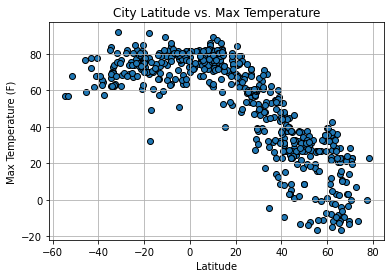

In [10]:
# Create a Scatter Plot for Latitude vs Temperature 
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker= 'o', edgecolors='black')
plt.xlabel("Latitude") 
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)
plt.savefig("output_data/Fig1.png")
plt.show() 

##### The code is creating a scatter plot to showcase the relationship between Temperature (F) and Latitude. From the plot,  it has been observed that the closer to 0 latitude, the higher the temperature and as the latitude increases or decreases, temperature drops.

## Latitude vs. Humidity Plot

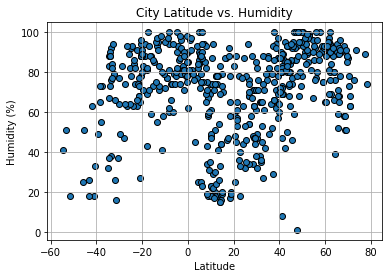

In [12]:
# Create a Scatter Plot for Latitude vs Humidity Plot 
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker= 'o', edgecolors='black')
plt.xlabel("Latitude") 
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)
plt.savefig("output_data/Fig2.png")
plt.show() 

##### The code is creating a scatter plot to showcase the relationship between Humidity (%) and Latitude. From the plot, it has been observed that hudmity is higher near the equator and in the southern hemisphere.

## Latitude vs. Cloudiness Plot

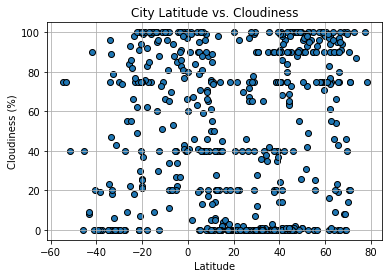

In [14]:
# Create a Scatter Plot for Latitude vs Cloudiness 
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker= 'o', edgecolors='black')
plt.xlabel("Latitude") 
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)
plt.savefig("output_data/Fig3.png")
plt.show() 

##### The code is creating a scatter plot to showcase the relationship between Cloudiness (%) and Latitude. From the plot, it has been observed that there is no clear correlation between cloudiness and latitude.

## Latitude vs. Wind Speed Plot

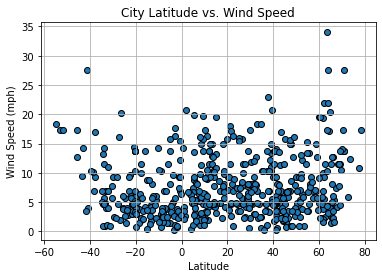

In [16]:
# Create a Scatter Plot for Latitude vs Wind Speed Plot 
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker= 'o', edgecolors='black')
plt.xlabel("Latitude") 
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)
plt.savefig("output_data/Fig4.png")
plt.show() 

##### The code is creating a scatter plot to showcase the relationship between Wind Speed (mph) and Latitude. From the plot, it has been observed that wind speed remains relatively unchanged across latitudes. 

## Linear Regression

In [18]:
# Find cities in Northern Hemisphere 
northern_hemisphere = clean_city_data.loc[clean_city_data['Lat'] >= 0] 

# Find cities in Southern Hemisphere 
southern_hemisphere = clean_city_data.loc[clean_city_data['Lat'] < 0] 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7658149821294853


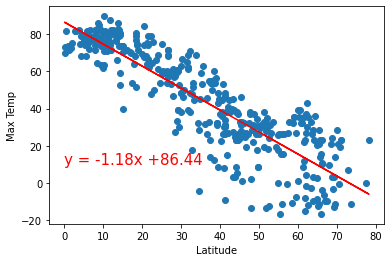

In [19]:
# Perform a linear regression on Northern Hemisphere - Max Temp vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere['Lat'], northern_hemisphere['Max Temp'])

# Get regression values
regress_values = northern_hemisphere['Lat'] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(northern_hemisphere['Lat'], northern_hemisphere['Max Temp'])
plt.plot(northern_hemisphere['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(0,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

##### The linear regression is modeling the relationship between Temperature (F) and Latitude in the Northern Hemisphere. From the plot, it has been observed that the temperature and latitude have a strong negative correlation. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.08454885009710808


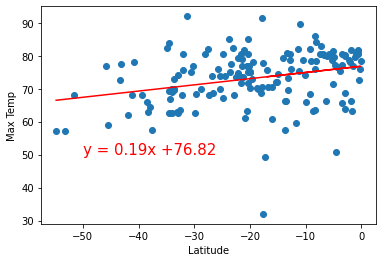

In [21]:
# Perform a linear regression on Northern Hemisphere - Max Temp vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere['Lat'], southern_hemisphere['Max Temp'])

# Get regression values
regress_values = southern_hemisphere['Lat'] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(southern_hemisphere['Lat'], southern_hemisphere['Max Temp'])
plt.plot(southern_hemisphere['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

##### The linear regression is modeling the relationship between Temperature (F) and Latitude in the Southern Hemisphere. From the plot, it has been observed that the temperature and latitude have a weak positive correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.159653078163794


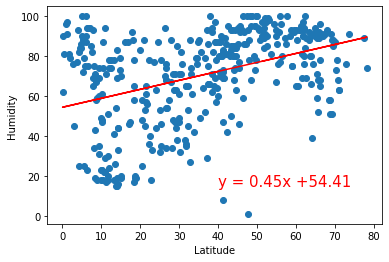

In [23]:
# Perform a linear regression on Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere['Lat'], northern_hemisphere['Humidity'])

# Get regression values
regress_values = northern_hemisphere['Lat'] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(northern_hemisphere['Lat'], northern_hemisphere['Humidity'])
plt.plot(northern_hemisphere['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(40,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

##### The linear regression is modeling the relationship between Humidity (%) and Latitude in the Northern Hemisphere. From the plot, it has been observed that the humidity and latitude have a weak positive correlation.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2682597693122413


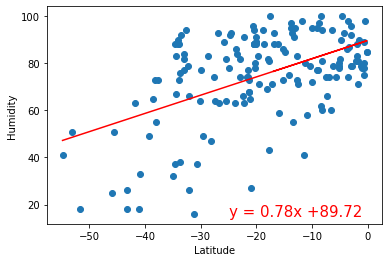

In [25]:
# Perform a linear regression on Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere['Lat'], southern_hemisphere['Humidity'])

# Get regression values
regress_values = southern_hemisphere['Lat'] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(southern_hemisphere['Lat'], southern_hemisphere['Humidity'])
plt.plot(southern_hemisphere['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

##### The linear regression is modeling the relationship between Humidity (%) and Latitude in the Southern Hemisphere. From the plot, it has been observed that the humidity and latitude have a weak positive correlation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06212726511569402


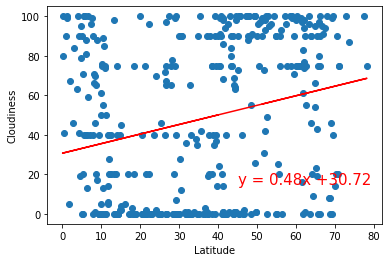

In [27]:
# Perform a linear regression on Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere['Lat'], northern_hemisphere['Cloudiness'])

# Get regression values
regress_values = northern_hemisphere['Lat'] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(northern_hemisphere['Lat'], northern_hemisphere['Cloudiness'])
plt.plot(northern_hemisphere['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

##### The linear regression is modeling the relationship between Cloudiness (%) and Latitude in the Northern Hemisphere. From the plot, it has been observed that the cloudiness and latitude have a weak positive correlation.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1777826413116068


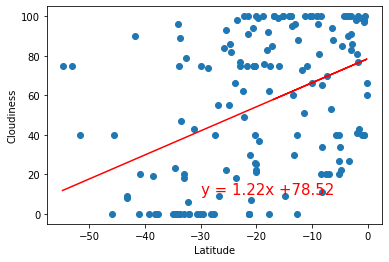

In [29]:
# Perform a linear regression on Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere['Lat'], southern_hemisphere['Cloudiness'])

# Get regression values
regress_values = southern_hemisphere['Lat'] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(southern_hemisphere['Lat'], southern_hemisphere['Cloudiness'])
plt.plot(southern_hemisphere['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

##### The linear regression is modeling the relationship between Cloudiness (%) and Latitude in the Southern Hemisphere. From the plot, it has been observed that the cloudiness and latitude have a weak positive correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.013623321334893992


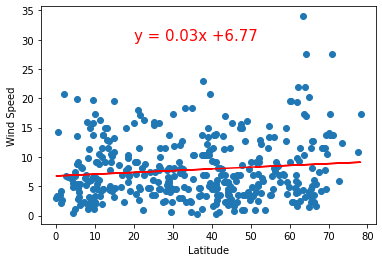

In [31]:
# Perform a linear regression on Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere['Lat'], northern_hemisphere['Wind Speed'])

# Get regression values
regress_values = northern_hemisphere['Lat'] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(northern_hemisphere['Lat'], northern_hemisphere['Wind Speed'])
plt.plot(northern_hemisphere['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

##### The linear regression is modeling the relationship between Wind Speed (mph) and Latitude in the Northern Hemisphere. From the plot, it has been observed that the wind speed and latitude have a weak positive correlation.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08877983036308768


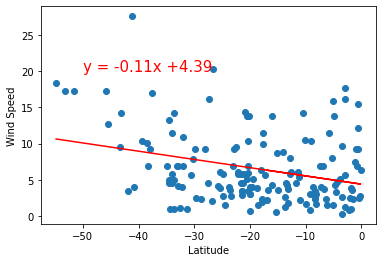

In [33]:
# Perform a linear regression on Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere['Lat'], southern_hemisphere['Wind Speed'])

# Get regression values
regress_values = southern_hemisphere['Lat'] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(southern_hemisphere['Lat'], southern_hemisphere['Wind Speed'])
plt.plot(southern_hemisphere['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

##### The linear regression is modeling the relationship between Wind Speed (mph) and Latitude in the Southern Hemisphere. From the plot, it has been observed that the wind speed and latitude have a weak negative correlation.